In [63]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.colors

In [116]:
flow = pd.read_csv('../matrix.csv')
flow['src_name'] = flow['src_name'].str.title()
flow['dst_name'] = flow['dst_name'].str.title()
flow.sort_values(['dst_name','src_name'],inplace=True)

# thresh = flow['flow'].quantile(0.25)
# flow['flow'] = flow['flow'].apply(lambda x: 0 if x<thresh else x)

labels = list(sorted(flow['src_name'].unique()))
flow['src'] = flow['src_name'].apply(lambda x: labels.index(x))
flow['dst'] = flow['dst_name'].apply(lambda x: labels.index(x)+len(labels))

In [154]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#000000']
#flow['color'] = flow['src'].apply(lambda x: str(matplotlib.colors.to_rgba(colors[x])).replace('(','rgba(').replace('1.0)','0.2)'))
flow['color'] = flow['src'].apply(lambda x: str(matplotlib.colors.to_rgba(colors[x])).replace('(','rgba(').replace('1.0)','0.2)') if x not in [2,13] else 'blank')

In [155]:
flow[flow.src==2].color.unique()

array(['blank'], dtype=object)

In [176]:
flow.loc[flow.src_name=='Nondurable','color'] = 'rgba(1.0,1.0,0.6,0.2)'
flow.loc[flow.src_name=='Agriculture','color'] = 'rgba(1.0,1.0,0.6,0.5)'

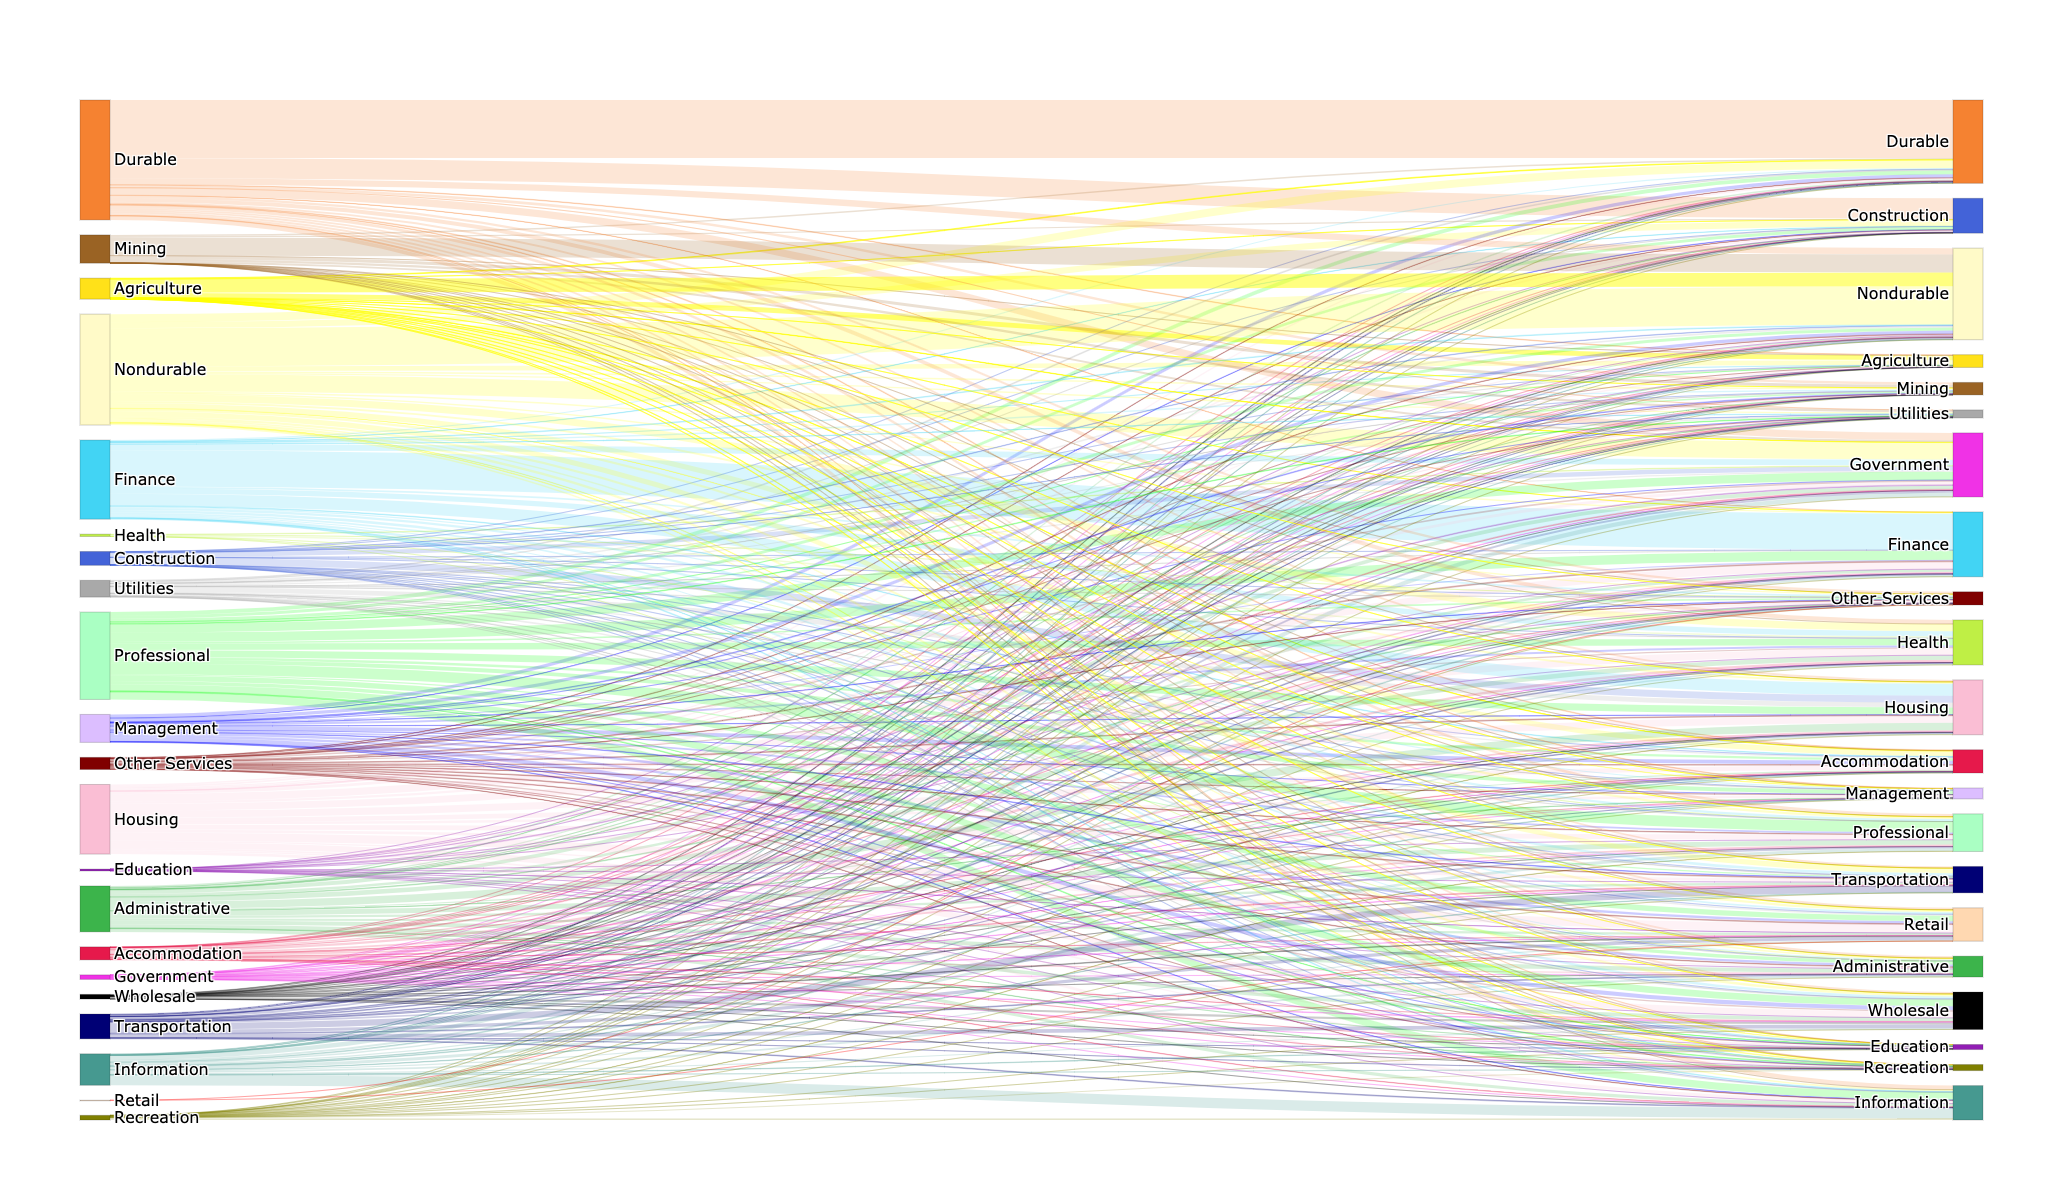

In [179]:
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 30,
      line = dict(color = "black", width = 0.1),
      label =  labels + labels,
      color =  colors + colors
    ),
    # Add links
    link = dict(
      source =  flow['src'].values,
      target =  flow['dst'].values,
      value =  flow['flow'].values,
      color =  flow['color'].values
))])
fig.update_layout(font_size=16,autosize=False,width=1000,height=1200)
fig.show()